In [1]:
from pyspark.find_spark_home import _find_spark_home
from pyspark.sql import SparkSession
from pyspark import SparkConf

print(_find_spark_home())

C:\spark\spark-3.5.0-bin-hadoop3\spark-3.5.0-bin-hadoop3


In [2]:
conf = SparkConf()\
    .setMaster('local[*]')\
    .set('spark-local-dir', 'C:\\spark-temp')\
    .set('spark.driver.memory', '10g')\
    .set('spark.executor.memory', '10g')\
    .set('spark.driver.maxResultSize', '10g')\
    .set('spark.pyspark.python', 'C:\\Users\\DELL\\anaconda3\\envs\\BigData310\\python.exe')\
    .set('spark.pyspark.driver.python', 'C:\\Users\\DELL\\anaconda3\\envs\\BigData310\\python.exe')

In [3]:
spark = SparkSession.builder.appName("big_data_project").config(conf=conf).getOrCreate()
sc = spark.sparkContext

for item in sc.getConf().getAll():  print(item)

('spark.driver.host', 'DESKTOP-KVA8UIV')
('spark.executor.memory', '10g')
('spark.driver.memory', '10g')
('spark.executor.id', 'driver')
('spark.pyspark.driver.python', 'C:\\Users\\DELL\\anaconda3\\envs\\BigData310\\python.exe')
('spark.app.id', 'local-1704356322947')
('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UN

In [4]:
un_member_states = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic",
    "Democratic People's Republic of Korea", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany",
    "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Ivory Coast", "Jamaica", "Japan",
    "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives",
    "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal",
    "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway",
    "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal",
    "Qatar", "Republic of Korea", "Republic of Moldova", "Romania", "Russian Federation", "Rwanda",
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino",
    "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia",
    "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname",
    "Sweden", "Switzerland", "Syrian Arab Republic", "Tajikistan", "Thailand", "Timor-Leste", "Togo", "Tonga",
    "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "United Republic of Tanzania", "United States of America", "Uruguay", "Uzbekistan", "Vanuatu",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

positions = {
    'Germany': (10.45, 51.16),
    'France': (1.89, 46.60),
    'Italy': (12.57, 41.87),
    'Spain': (-3.75, 40.46),
    'Canada': (-106.35, 56.13),
    'Australia': (133.78, -25.27),
    'Austria': (14.17, 47.52),
    'China': (104.19, 35.86),
    'Japan': (138.25, 36.20),
    'Poland': (19.15, 51.92),
    'Netherlands': (5.29, 52.13),
    'Switzerland': (8.23, 46.82),
    'Sweden': (18.64, 60.13),
    'Belgium': (4.35, 50.85),
    'India': (78.96, 20.59),
    'Norway': (8.47, 60.47),
    'Ireland': (-7.97, 53.42)
}

In [5]:
# Load data from HDFS
df = spark.read.parquet('hdfs://localhost:9000/big_data_project/archive/')

df.show()

+--------+--------------------+--------------------+--------------------+
|      id|               title|                text|          categories|
+--------+--------------------+--------------------+--------------------+
|49495844|A & B High Perfor...|A & B High Perfor...|[Defunct firearms...|
| 3579086|         A & C Black|A & C Black is a ...|[Encyclopædia Bri...|
|62397582|A & F Harvey Brot...|A & F Harvey Brot...|      [Cotton mills]|
|15547032|         A & G Price|A & G Price Limit...|[Locomotive manuf...|
| 8021609|  A & M Karagheusian|thumb|right|238px...|[1904 establishme...|
|28380942|A & P Food Stores...|The A & P Food St...|[Art Deco archite...|
|38966582|     A & R Recording|A & R Recording I...|[1958 establishme...|
|20016047|       A (1965 film)|A is a 1965 short...|[1965 films, West...|
|24604084|A (1998 Japanese ...|A is a 1998 Japan...|[1998 films, Japa...|
|23488527|A (1998 Kannada f...|A is an 1998 Indi...|[Films set in Ban...|
|38780882|A (Agnetha Fältsk...|{{Album

In [6]:
# Find statisctis of the dataset:
print(df.count())
df.describe()

12573550


DataFrame[summary: string, id: string, title: string, text: string]

Get each country mentioning in text fields

In [7]:
from pyspark.sql.functions import col, split, regexp_replace, array_intersect, lit, size
from pyspark import StorageLevel

# Exclude all columns except for text
df_only_text = df.select(col('text'))

# Split text into single words
df_only_text = df_only_text.withColumn("text", split(regexp_replace("text", "[^a-zA-Z\\s]", " "), "\\s+"))

# Filter out all words that are not in the list of UN member states
df_countries_in_text = df_only_text.withColumn('country mentions in text', array_intersect(col('text'), lit(un_member_states))).drop('text').drop('un_members')

df_countries_in_text = df_countries_in_text.filter(size(col('country mentions in text')) > 0)
df_countries_in_text.show()

+------------------------+
|country mentions in text|
+------------------------+
|                 [India]|
|    [Malaysia, Singap...|
|                [Turkey]|
|                 [India]|
|    [Germany, Austria...|
|    [Japan, Australia...|
|                 [India]|
|    [Jordan, Jamaica,...|
|                 [Japan]|
|               [Ireland]|
|       [Canada, Germany]|
|          [China, Japan]|
|       [Mexico, Iceland]|
|                [France]|
|                [Canada]|
|                  [Iran]|
|    [Brazil, Japan, M...|
|                 [India]|
|       [India, Pakistan]|
|                 [India]|
+------------------------+
only showing top 20 rows



Get each country mentioning in title fields

In [8]:
from pyspark.sql.functions import col
from pyspark.sql.functions import col, split

#select the title column
df_only_title = df.select(col('title'))

#split title entries and create an array
df_arrayed_title = df_only_title.withColumn("title_array", split(col("title"), "[\s\(\)\&]+"))

#select the new array column and make a df of it
df_arrayed_title = df_arrayed_title.select("title_array")

# Create a column with un_member_states mentioned in title_array
df_with_keywords = df_arrayed_title.withColumn("country mentions in title", array_intersect(col("title_array"), lit(un_member_states)))

#filter out the empty entries
df_filtered_keywords = df_with_keywords.filter(size(col("country mentions in title"))  > 0)
df_countries_in_title = df_filtered_keywords.drop("title_array")

# Show the result
df_countries_in_title.show(truncate=False)

+-------------------------+
|country mentions in title|
+-------------------------+
|[Montenegro]             |
|[China]                  |
|[France]                 |
|[Morocco]                |
|[Italy]                  |
|[Egypt]                  |
|[Spain]                  |
|[Australia]              |
|[Australia]              |
|[Australia]              |
|[Congo]                  |
|[Ukraine]                |
|[Australia]              |
|[Australia]              |
|[Mexico]                 |
|[Australia]              |
|[France]                 |
|[Mexico]                 |
|[Australia]              |
|[Mexico]                 |
+-------------------------+
only showing top 20 rows



# Country count Analysis

In [9]:
from pyspark.sql.functions import explode, count, desc

# Count in how many articles each country is mentioned in text
df_country_count_in_text = df_countries_in_text.select(explode('country mentions in text').alias('country'))
df_country_count_in_text = df_country_count_in_text.groupBy('country').agg(count("*").alias("count")).orderBy(desc('count'))

In [10]:
# Count in how many articles each country is mentioned in title
df_country_count_in_title = df_countries_in_title.select(explode('country mentions in title').alias('country'))
df_country_count_in_title = df_country_count_in_title.groupBy('country').agg(count("*").alias("count")).orderBy(desc('count'))

In [11]:
# Convert the data into a Python dictionary (30 most mentioned countries)
data_list = df_country_count_in_text.limit(30).collect()
count_in_text_dict = {row['country']: row['count'] for row in data_list}

In [12]:
data_list = df_country_count_in_title.limit(30).collect()
count_in_title_dict = {row['country']: row['count'] for row in data_list}

Count Graph - TEXT

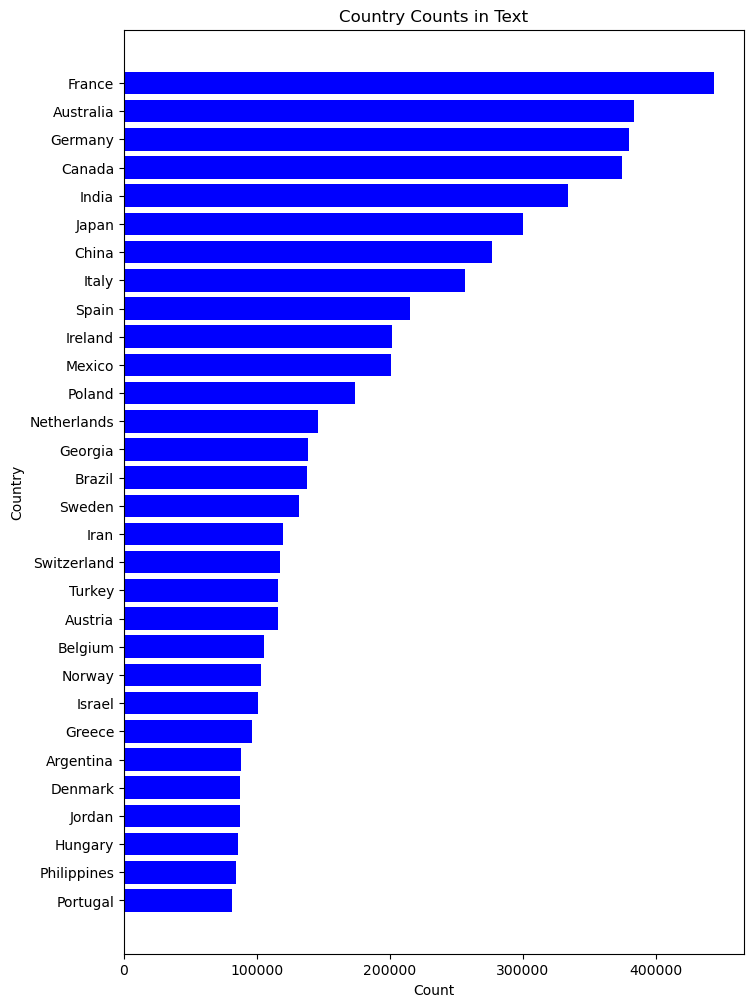

In [13]:
# Plot the country counts in a bar chart
import matplotlib.pyplot as plt


countries = list(count_in_text_dict.keys())[::-1]
counts = list(count_in_text_dict.values())[::-1]

fig, ax = plt.subplots(figsize=(8, 12))

# Plotting the vertical bar chart
ax.barh(countries, counts, color='blue')

# Adding labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Country')
ax.set_title('Country Counts in Text')

# Display the bar chart
plt.show()

Count Graph - TITLE

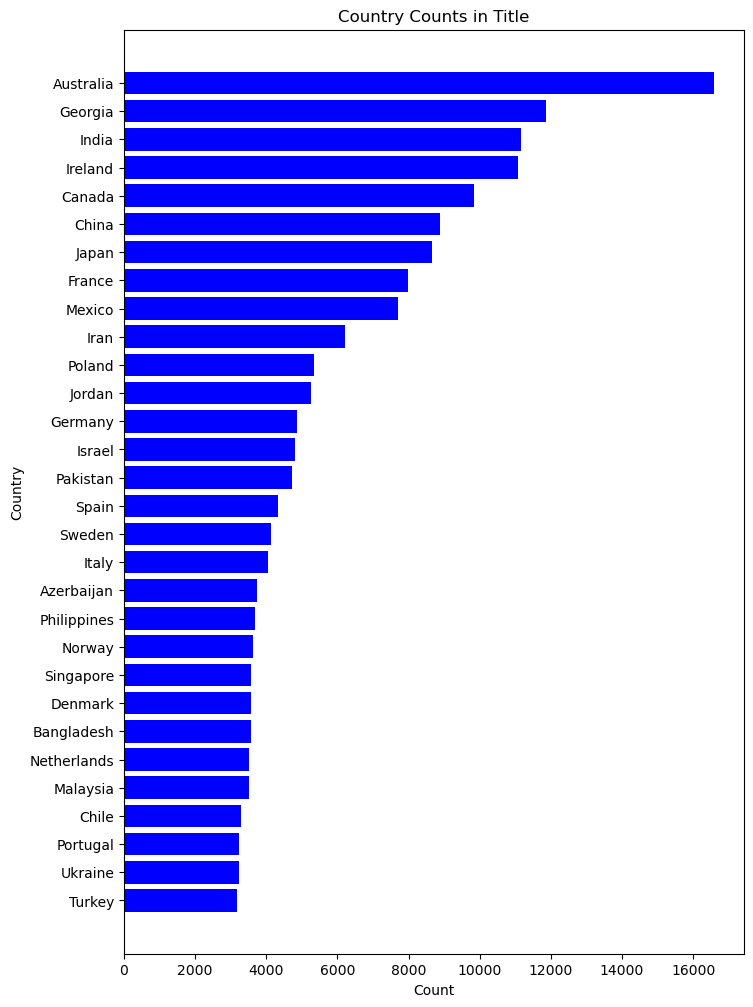

In [14]:

import matplotlib.pyplot as plt

countries = list(count_in_title_dict.keys())[::-1]
counts = list(count_in_title_dict.values())[::-1]

fig, ax = plt.subplots(figsize=(8, 12))

# Plotting the vertical bar chart
ax.barh(countries, counts, color='blue')

# Adding labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Country')
ax.set_title('Country Counts in Title')

# Display the bar chart
plt.show()

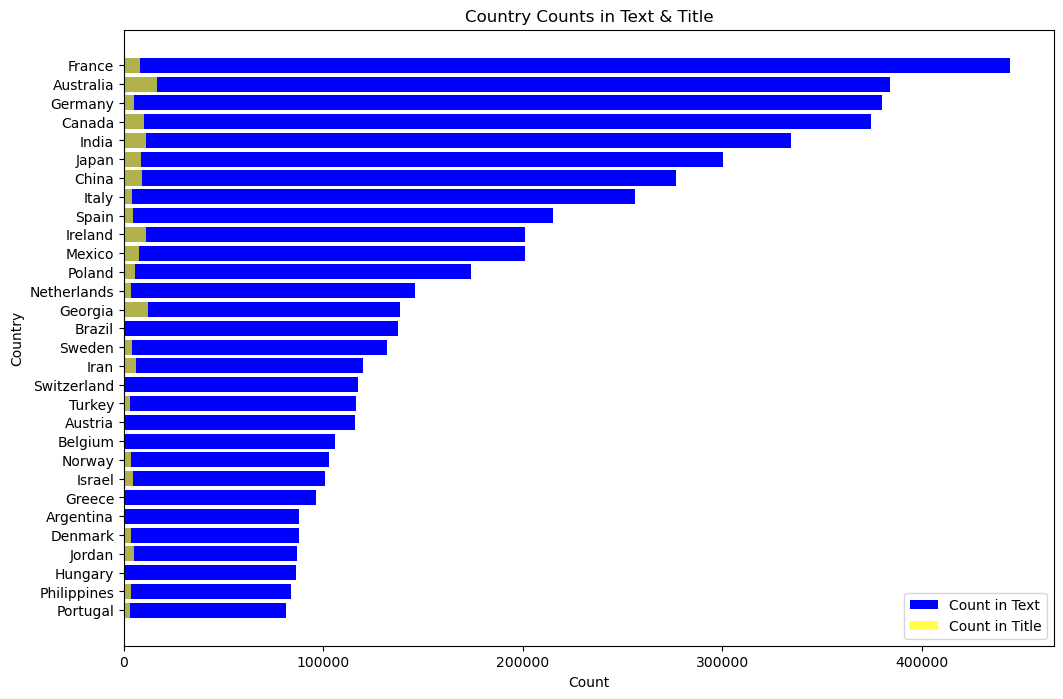

['Pakistan', 'Azerbaijan', 'Singapore', 'Bangladesh', 'Malaysia', 'Chile', 'Ukraine']


In [15]:
import matplotlib.pyplot as plt

countries = list(count_in_text_dict.keys())[::-1]
counts = list(count_in_text_dict.values())[::-1]
# counts_in_title = list(count_in_title_dict.values())[::-1]

counts_in_title = []
only_top_30_titles = list(count_in_title_dict.keys())
for country in countries:
    if country in count_in_title_dict.keys():
        counts_in_title.append(count_in_title_dict[country])
        only_top_30_titles.remove(country)
    else:
        counts_in_title.append(0)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the first bar chart (count in text)
ax.barh(countries, counts, color='blue', label='Count in Text')

# Plotting the second bar chart (count in title) with a different color
ax.barh(countries, counts_in_title, color='yellow', alpha=0.7, label='Count in Title')

# Adding labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Country')
ax.set_title('Country Counts in Text & Title')

# Display the legend
ax.legend()

# Display the bar chart
plt.show()
print(only_top_30_titles)

# Graph Analysis - 30 strongest country links in text

In [16]:
# Drop all rows where less than 2 countries are mentioned
df_countries_in_text = df_countries_in_text.filter(size(col('country mentions in text')) > 1)

df_countries_in_text.show()


+------------------------+
|country mentions in text|
+------------------------+
|    [Malaysia, Singap...|
|    [Germany, Austria...|
|    [Japan, Australia...|
|    [Jordan, Jamaica,...|
|       [Canada, Germany]|
|          [China, Japan]|
|       [Mexico, Iceland]|
|    [Brazil, Japan, M...|
|       [India, Pakistan]|
|    [Australia, Bangl...|
|    [Bangladesh, Paki...|
|       [Ireland, Poland]|
|    [Georgia, Austral...|
|    [Argentina, Parag...|
|      [Italy, Argentina]|
|    [Argentina, Italy...|
|    [Netherlands, Pan...|
|      [Japan, Indonesia]|
|    [Germany, Ukraine...|
|    [Brazil, Spain, D...|
+------------------------+
only showing top 20 rows



In [17]:
# Helper functions for graph analysis

from itertools import combinations
import networkx as nx

def generate_country_combinations(country_list):
    return list(combinations(country_list, 2))


def collapse_parallel_edges(multi_graph):
    collapsed_graph = nx.Graph()
    
    for u, v in multi_graph.edges():
        if not collapsed_graph.has_edge(u, v):
            collapsed_graph.add_edge(u, v, weight=1)
        else:
            collapsed_graph[u][v]['weight'] += 1

    return collapsed_graph

def add_weight_as_percentage(edges_with_weights):
    edges_with_percentage_weights = []
    max_weight = max(edges_with_weights, key=lambda x: x[2]['weight'])[2]['weight']
    for edge in edges_with_weights:
        edge[2]['percentage_weight'] = (edge[2]['weight'] / max_weight)
        edges_with_percentage_weights.append(edge)
    
    return edges_with_percentage_weights


In [18]:
# Helper functions for graph analysis

from itertools import combinations
import networkx as nx

def generate_country_combinations(country_list):
    return list(combinations(country_list, 2))


def collapse_parallel_edges(multi_graph):
    collapsed_graph = nx.Graph()
    
    for u, v in multi_graph.edges():
        if not collapsed_graph.has_edge(u, v):
            collapsed_graph.add_edge(u, v, weight=1)
        else:
            collapsed_graph[u][v]['weight'] += 1

    return collapsed_graph

def add_weight_as_percentage(edges_with_weights):
    edges_with_percentage_weights = []
    max_weight = max(edges_with_weights, key=lambda x: x[2]['weight'])[2]['weight']
    for edge in edges_with_weights:
        edge[2]['percentage_weight'] = (edge[2]['weight'] / max_weight)
        edges_with_percentage_weights.append(edge)
    
    return edges_with_percentage_weights


In [19]:
# Convert data into regular python lists and create a graph with aggregated weights
array_data = df_countries_in_text.select("country mentions in text").collect()
unpacked_lists = [list(row['country mentions in text']) for row in array_data]

country_graph = nx.MultiGraph()

for li in unpacked_lists:
    country_graph.add_edges_from(generate_country_combinations(li))

collapsed_graph = collapse_parallel_edges(country_graph)

# Use only 30 most common links for the result graph
edges_with_weights = [(u, v, d) for u, v, d in collapsed_graph.edges(data=True)]
sorted_edges = sorted(edges_with_weights, key=lambda x: x[2]['weight'], reverse=True)
highest_50_weights = nx.Graph(add_weight_as_percentage(sorted_edges[:30]))


C:\Users\DELL\AppData\Local\Temp\ipykernel_8764\1788158955.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


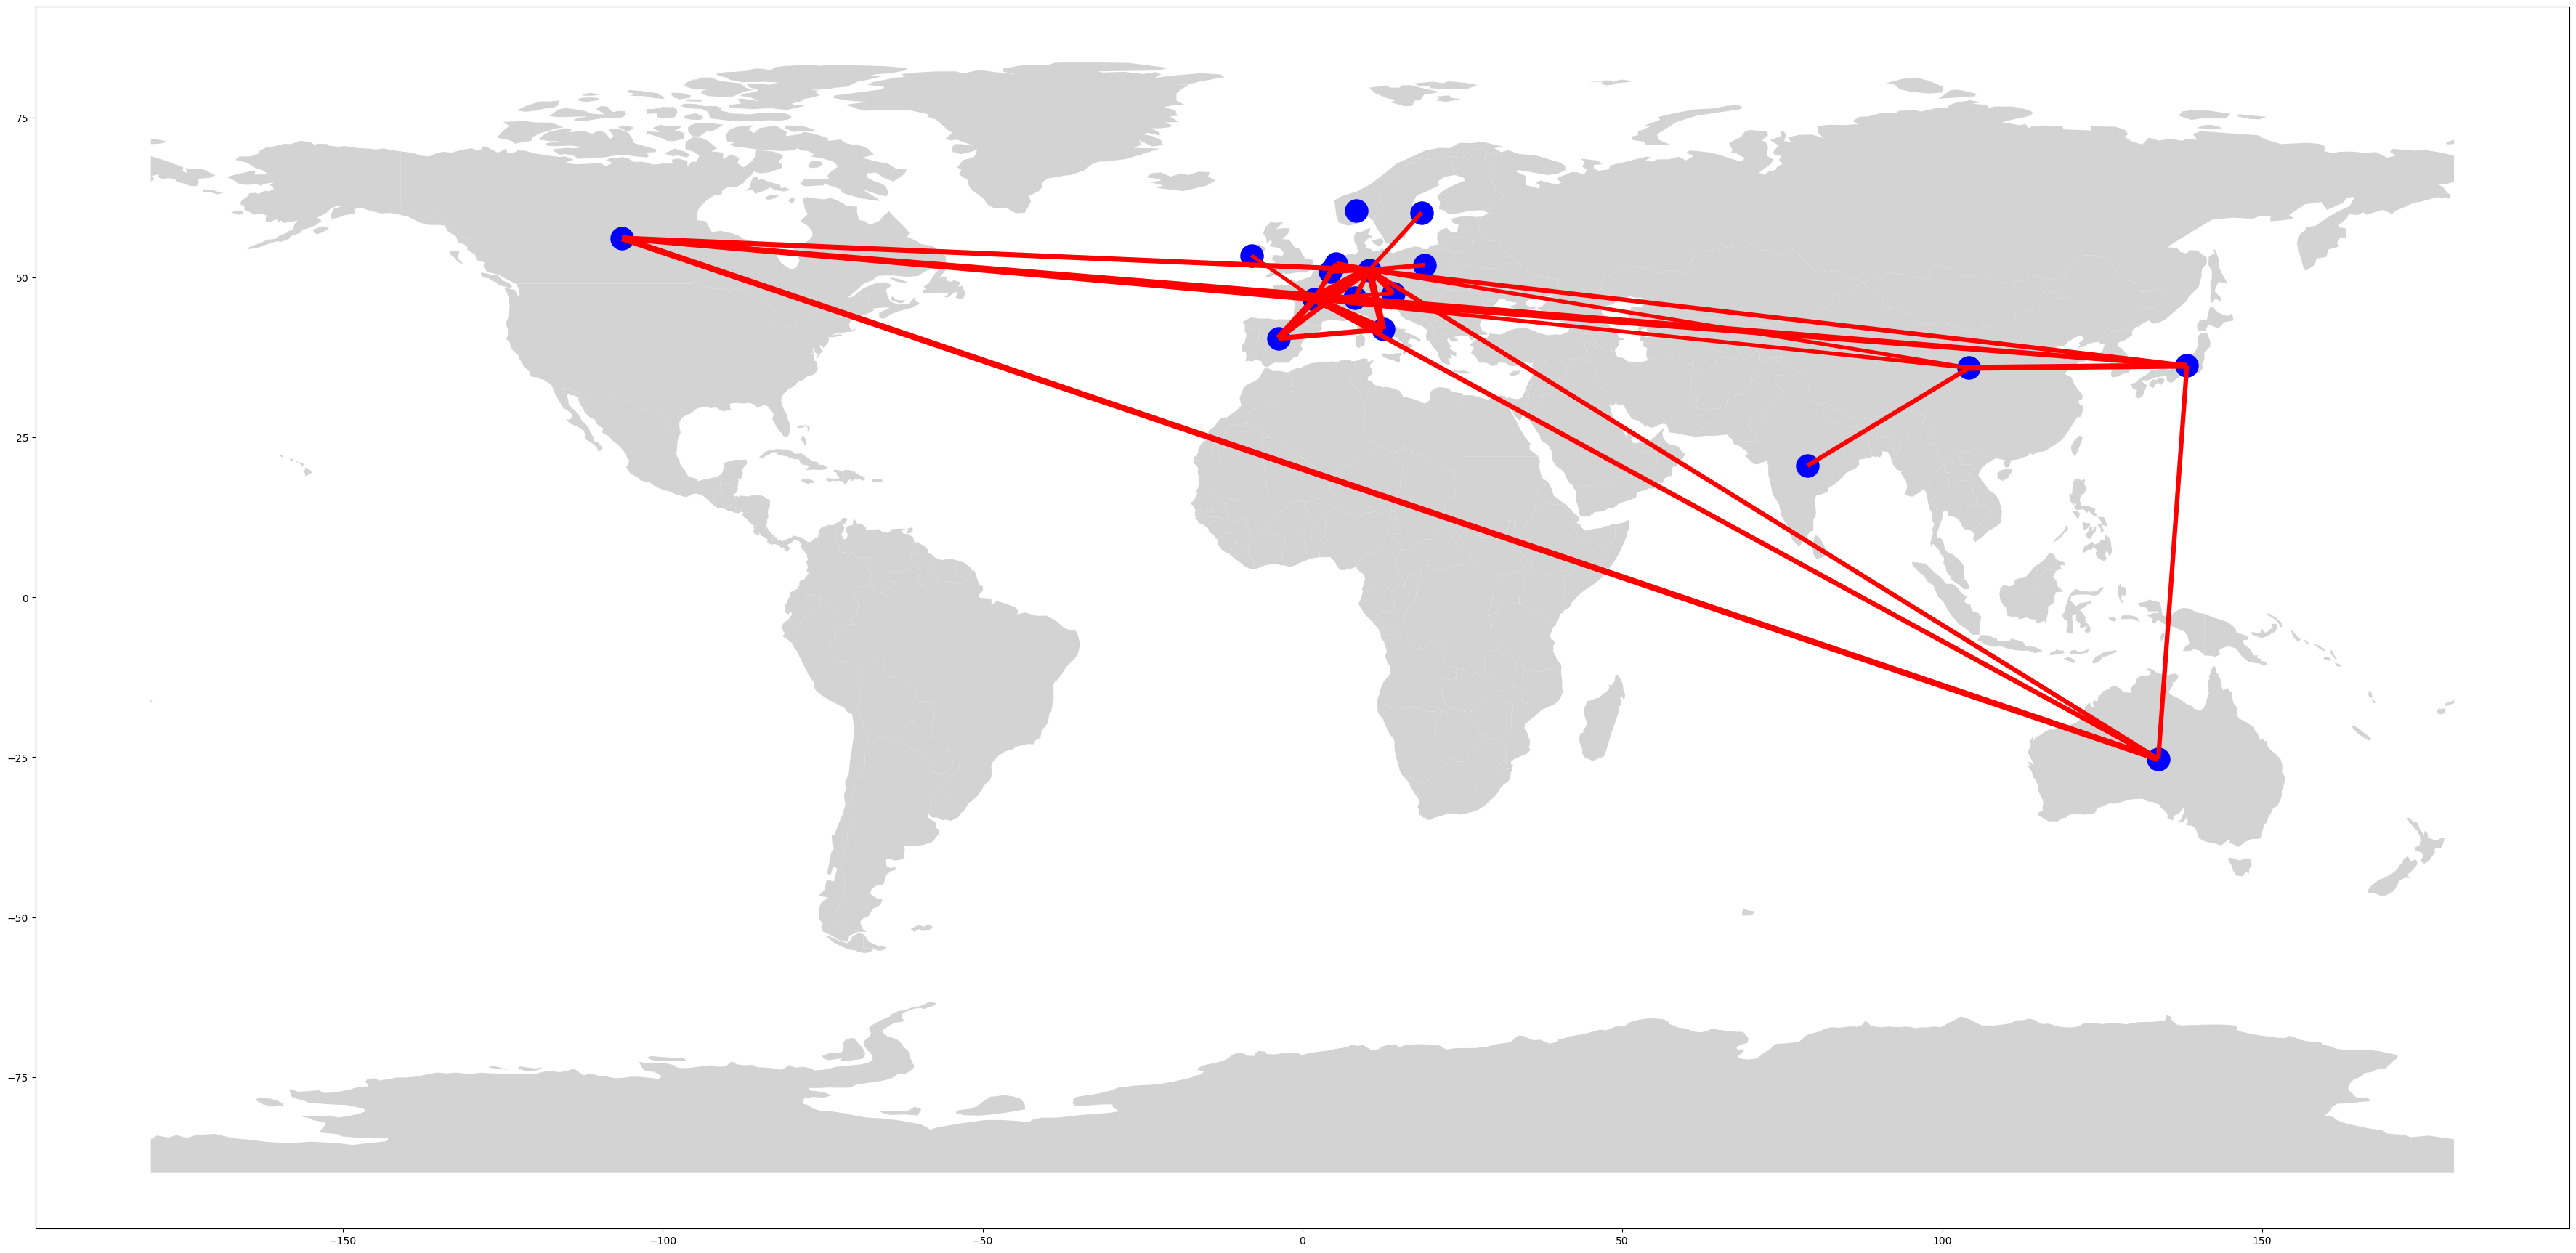

In [20]:
# Plot the graph containing the 30 strongest country links

import geopandas as gpd
from shapely.geometry import LineString, Point


# Create a GeoDataFrame for the edges
gdf_nodes = gpd.GeoDataFrame(geometry=[Point(pos) for pos in positions.values()])

# Create a GeoDataFrame for the edges
edge_lines = []
for edge in highest_50_weights.edges(data=True):
    edge_lines.append({
        'geometry': LineString([positions[edge[0]], positions[edge[1]]]),
        'edge': edge,
        'weight': edge[2]['percentage_weight']
    })

edges_gdf = gpd.GeoDataFrame(edge_lines, crs=gdf_nodes.crs)

# Load the world map shapefile from geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(45, 30), color='lightgray')

# Plot the nodes on top of the world map
gdf_nodes.plot(ax=ax, color='blue', markersize=500)

# Plot the edges
edges_gdf.plot(ax=ax, color='red', linewidth=edges_gdf['weight']*10)

plt.show()